# FinanceDataReader : 주가 데이터를 가져올 수 있는 파이썬 패키지

- pip install finance-datareader

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os


In [3]:
# 경고메시지 끄기
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'


In [4]:
import FinanceDataReader as fdr

apple = fdr.DataReader('AAPL')
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-20,164.51,166.98,169.68,164.18,85850000.0,-0.0103
2022-01-21,162.41,164.41,166.33,162.30,122850000.0,-0.0128
2022-01-24,161.62,160.02,162.30,154.70,161420000.0,-0.0049
2022-01-25,159.78,158.98,162.76,157.02,112530000.0,-0.0114
2022-01-26,159.69,163.50,164.39,157.82,107490000.0,-0.0006


In [6]:
ford = fdr.DataReader('F', '1980-01-01', '2022-12-30')
ford

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393
...,...,...,...,...,...,...
2022-01-20,21.65,21.88,22.88,21.57,149800000.0,-0.0356
2022-01-21,20.65,21.21,21.50,20.54,145530000.0,-0.0462
2022-01-24,20.39,19.93,20.47,18.80,185690000.0,-0.0126


In [8]:
stock = fdr.DataReader(symbol='005930', start='1980-01-01', end='2022-01-28')
stock

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-12-17,822,838,797,810,585420,NaN
1997-12-19,752,795,745,745,705280,-0.080247
1997-12-20,750,784,716,751,255040,0.008054
1997-12-22,754,775,738,740,189200,-0.014647
1997-12-23,739,739,680,681,731790,-0.079730
...,...,...,...,...,...,...
2022-01-21,75800,75800,74700,75600,15774888,-0.011765
2022-01-24,75400,75800,74700,75100,13691134,-0.006614
2022-01-25,74800,75000,73200,74000,17766704,-0.014647


In [9]:
stock.index

DatetimeIndex(['1997-12-17', '1997-12-19', '1997-12-20', '1997-12-22',
               '1997-12-23', '1997-12-24', '1997-12-26', '1997-12-27',
               '1998-01-03', '1998-01-05',
               ...
               '2022-01-14', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [10]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day
stock

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-12-17,822,838,797,810,585420,NaN,1997,12,17
1997-12-19,752,795,745,745,705280,-0.080247,1997,12,19
1997-12-20,750,784,716,751,255040,0.008054,1997,12,20
1997-12-22,754,775,738,740,189200,-0.014647,1997,12,22
1997-12-23,739,739,680,681,731790,-0.079730,1997,12,23
...,...,...,...,...,...,...,...,...,...
2022-01-21,75800,75800,74700,75600,15774888,-0.011765,2022,1,21
2022-01-24,75400,75800,74700,75100,13691134,-0.006614,2022,1,24
2022-01-25,74800,75000,73200,74000,17766704,-0.014647,2022,1,25


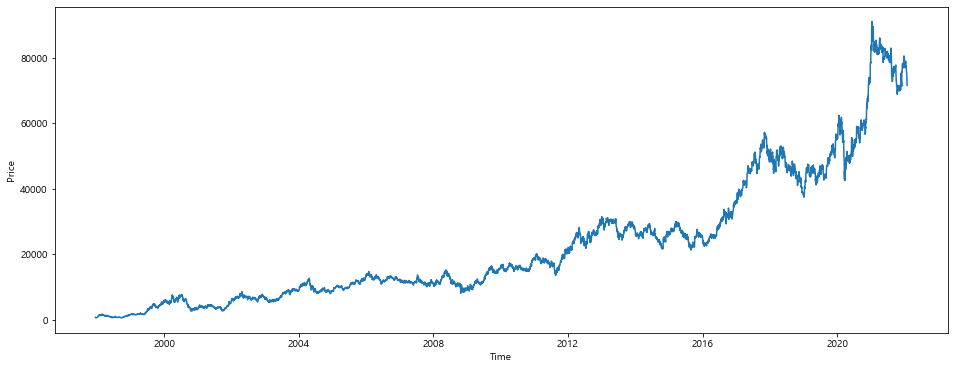

In [12]:
plt.figure(figsize=(16, 6))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [13]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

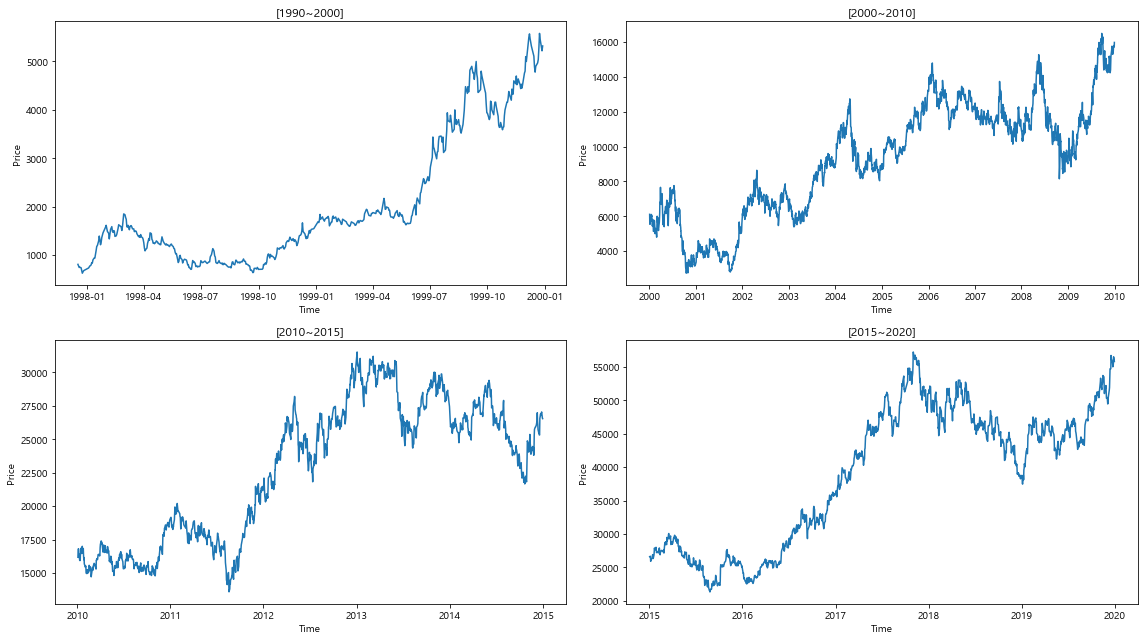

In [15]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) &
                   (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'[{time_steps[i][0]}~{time_steps[i][1]}]')
    ax.set_xlabel('Time')
    ax.set_ylabel('Price')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.00910299, 0.00865702, 0.00890503, 0.00202494, 0.00648261],
       [0.0083278 , 0.00821281, 0.00832402, 0.0013057 , 0.00780988],
       [0.00830565, 0.00809917, 0.008     , 0.00137209, 0.00282417],
       ...,
       [0.82834994, 0.77479339, 0.81787709, 0.81189072, 0.19673852],
       [0.81838317, 0.76859504, 0.81675978, 0.80414504, 0.14369704],
       [0.81727575, 0.76446281, 0.79664804, 0.78422759, 0.2273174 ]])

In [17]:
df = pd.DataFrame(scaled, columns=scale_cols)
df

,Open,High,Low,Close,Volume
0,0.009103,0.008657,0.008905,0.002025,0.006483
1,0.008328,0.008213,0.008324,0.001306,0.007810
2,0.008306,0.008099,0.008000,0.001372,0.002824
3,0.008350,0.008006,0.008246,0.001250,0.002095
4,0.008184,0.007634,0.007598,0.000598,0.008103
...,...,...,...,...,...
5995,0.839424,0.783058,0.834637,0.829595,0.174682
5996,0.834994,0.783058,0.834637,0.824062,0.151608
5997,0.828350,0.774793,0.817877,0.811891,0.196739
5998,0.818383,0.768595,0.816760,0.804145,0.143697


In [18]:
df_x = df.drop('Close', axis=1)
df_y = df['Close']


In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0, shuffle=False)

In [23]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4800, 4) (1200, 4) (4800,) (1200,)


In [26]:
import tensorflow as tf

# 함수 설명

In [25]:
image = tf.zeros([10, 10, 3])
print(tf.expand_dims(image, axis=0).shape.as_list()) # 차원 추가 axis 0:맨 앞, 1:두번쨰, -1:마지막
print(tf.expand_dims(image, axis=1).shape.as_list())
print(tf.expand_dims(image, -1).shape.as_list())


[1, 10, 10, 3]
[10, 1, 10, 3]
[10, 10, 3, 1]


In [32]:
ds = tf.data.Dataset.range(10)

# ds.window(shift, stride, drop_remainder) 원본 dataset의 요소를 3개씩 묵어 서브 dataset을 생성
# window 메소드의 리턴값이 저장된 ds를 for 문에 사용하면 서브 dataset 하나씩 접근할 수 있다.
# shift=3: 크기 3인 서브 dataset을 생성  shift : 행 stride : 열 간격
# stride=2: 서브 dataset의 첫번째 요소의 값이 2씩 증가
# drop_remainder=True로 저장하면 크기 3 미만으로 남은 요소를 버림
ds = ds.window(4, stride=1, drop_remainder=True)

for d in ds:
    print(list(d.as_numpy_iterator()))

[0, 1, 2, 3]
[4, 5, 6, 7]


In [34]:
import tensorflow as tf
import numpy as np

ds = tf.data.Dataset.range(100)

window_size=10 
ds = ds.window(window_size, shift=5, stride=3, drop_remainder=True)
ds = ds.flat_map(lambda w: w.batch(window_size))

list_d = []

for d in ds:
    list_d.append(d)

array_d = np.array(list_d)
print(array_d.shape)
print(array_d)


(15, 10)
[[ 0  3  6  9 12 15 18 21 24 27]
 [ 5  8 11 14 17 20 23 26 29 32]
 [10 13 16 19 22 25 28 31 34 37]
 [15 18 21 24 27 30 33 36 39 42]
 [20 23 26 29 32 35 38 41 44 47]
 [25 28 31 34 37 40 43 46 49 52]
 [30 33 36 39 42 45 48 51 54 57]
 [35 38 41 44 47 50 53 56 59 62]
 [40 43 46 49 52 55 58 61 64 67]
 [45 48 51 54 57 60 63 66 69 72]
 [50 53 56 59 62 65 68 71 74 77]
 [55 58 61 64 67 70 73 76 79 82]
 [60 63 66 69 72 75 78 81 84 87]
 [65 68 71 74 77 80 83 86 89 92]
 [70 73 76 79 82 85 88 91 94 97]]


In [24]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds. window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size+1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [35]:
WINDOW_SIZE=20
BATCH_SIZE=32

In [36]:
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)


In [37]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수):{data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수):{data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수):(32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수):(32, 1)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [40]:
model = Sequential([
    Conv1D(filters=32, kernel_size=5, padding='causal', activation='relu', input_shape=[WINDOW_SIZE, 1]),
    LSTM(16, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1)
])

In [44]:
# Huber() 손실: 일정범위를 정해 그 안에 있으면 오차를 제곱, 그 밖에 있으면 오차의 절대값을 구하는 것
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [45]:
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
filename = os.path.join('tmp', 'checkpointer.ckpt')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             sae_best_only=True,
                             monitor='val_loss',
                             verboase=1)

In [52]:
history = model.fit(train_data, validation_data=(test_data), epochs=50,
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 1s 5ms/step - loss: 9.4289e-06 - mse: 1.8858e-05 - val_loss: 7.4238e-04 - val_mse: 0.0015
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 9.1078e-06 - mse: 1.8216e-05 - val_loss: 8.3982e-04 - val_mse: 0.0017
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 1.0152e-05 - mse: 2.0305e-05 - val_loss: 8.4162e-04 - val_mse: 0.0017
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 9.9963e-06 - mse: 1.9993e-05 - val_loss: 7.0052e-04 - val_mse: 0.0014
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 8.8480e-06 - mse: 1.7696e-05 - val_loss: 7.2252e-04 - val_mse: 0.0014
Epoch 6/50
150/150 [==============================] - 1s 4ms/step - loss: 9.7097e-06 - mse: 1.9419e-05 - val_loss: 6.1443e-04 - val_mse: 0.0012
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 9.4573e-06 - mse: 1.8915e-05 - val_loss: 8.1023e-04 - val_mse:

In [53]:
model.load_weights(filename)

In [54]:
pred = model.predict(test_data)

In [55]:
pred.shape

(1180, 1)

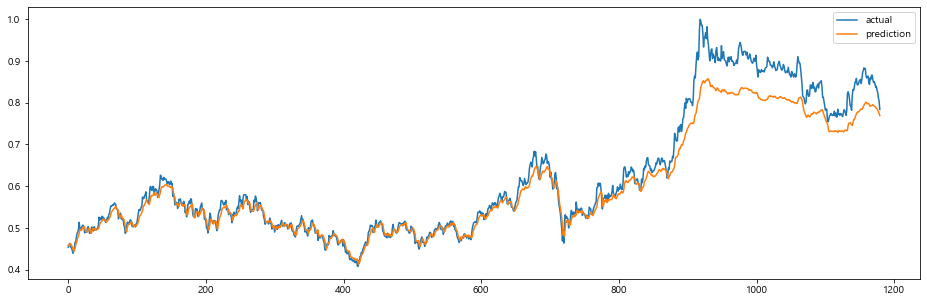

In [58]:
plt.figure(figsize=(16, 5))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

# ARIMA => 